In [25]:
!pip install facemorpher


In [26]:
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
%%time
zip_path = '/content/drive/My Drive/Colab Notebooks/allimgs_face2.zip'
!cp "{zip_path}" .
!unzip -q allimgs_face2.zip 
!rm allimgs_face2.zip

replace allimgs_face/.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace __MACOSX/allimgs_face/._.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: N
CPU times: user 59.9 ms, sys: 74.4 ms, total: 134 ms
Wall time: 17.4 s


In [28]:
train_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/train_data_clean_nosmall.csv')
test_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/test_data_clean_nosmall.csv')
total_df = pd.concat([train_df, test_df])
total_df = total_df[[total_df.columns[1],total_df.columns[2]] ]
total_df

,0,1
0,allimgs_face/Catherine GABRELLE candidat/googl...,False
1,allimgs_face/Mike Plummer Liberal Democrat/goo...,False
2,allimgs_face/Holly Kal-Weiss Labour/google_Hol...,False
3,allimgs_face/Anna Coda Labour/bing_Anna Coda L...,False
4,allimgs_face/Matt Rodda Labour/google_Matt Rod...,True
...,...,...
1073,allimgs_face/Mike Levin Dem/google_Mike Levin ...,True
1074,allimgs_face/Conservative Richard Bragdon/12c8...,True
1075,allimgs_face/Liberal Tim Louis/UV4Os6Uu_400x40...,True
1076,allimgs_face/Gareth Thomas Labour/wiki_Gareth ...,True


In [29]:
import facemorpher

In [30]:
from PIL import Image
import collections
import matplotlib.pyplot as plt
all_img_df = total_df
all_imgs_large = []
removed = 0
for file_name, winner in zip(all_img_df[all_img_df.columns[0]].values, all_img_df[all_img_df.columns[1]].values):
    # file_name = file_name.split('/')
    # file_name = 'allimgs_face'+'/'+file_name[1]+'/'+file_name[2]
    file_name = "/content/"+file_name
    img = Image.open(file_name)
    width, height = img.size
    if width < 100 or height < 100:
        removed +=1
    else:
        all_imgs_large.append([file_name, winner])
        
all_img_df = pd.DataFrame(all_imgs_large)
winners = all_img_df.loc[all_img_df[all_img_df.columns[1]] == True]
winners.drop_duplicates(inplace = True)
losers = all_img_df.loc[all_img_df[all_img_df.columns[1]] == False]
print('removed imgs: ', removed)
print('total',len(losers)+ len(winners))
print("loser", len(losers))
print('winner', len(winners))
print('loser_percentage', (len(losers) / (len(losers) +len(winners))))

removed imgs:  0
total 10766
loser 5284
winner 5482
loser_percentage 0.4908043841723946


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [31]:
win_paths = winners[winners.columns[0]].tolist()
loser_paths = losers[losers.columns[0]].tolist()
print(win_paths[:10])

['/content/allimgs_face/Matt Rodda Labour/google_Matt Rodda Labour1.jpeg', '/content/allimgs_face/Andrew Miller Labour/google_Andrew Miller Labour2.jpeg', '/content/allimgs_face/Thierry BENOIT candidat/google_Thierry BENOIT candidat2.jpeg', '/content/allimgs_face/Post, Achim SPD/google_Post, Achim SPD2.jpeg', '/content/allimgs_face/Beatrice DESCAMPS candidat/google_Beatrice DESCAMPS candidat2.jpeg', '/content/allimgs_face/Liberal Yasmin Ratansi/google_Liberal Yasmin Ratansi2.jpeg', '/content/allimgs_face/Michael Guest GOP/google_Michael Guest GOP1.jpeg', '/content/allimgs_face/Sadiq Khan Labour/wiki_Sadiq Khan Labour2.jpeg', '/content/allimgs_face/Jean-Luc WARSMANN candidat/google_Jean-Luc WARSMANN candidat8.jpeg', '/content/allimgs_face/Valerie PETIT candidat/google_Valerie PETIT candidat1.jpeg']


No face in /content/allimgs_face/Staffler, Katrin CSU/Staffler_Katrin_2017_by_FacesbyFrank.jpg
No face in /content/allimgs_face/Nicolas DEMOULIN candidat/Nicolas_Demoulin.jpg
No face in /content/allimgs_face/Pau, Petra DIE LINKE/google_Pau, Petra DIE LINKE5.jpeg
No face in /content/allimgs_face/Bernard BROCHAND candidat/google_Bernard BROCHAND candidat3.jpeg
No face in /content/allimgs_face/Geoffrey Robinson Labour/wiki_Geoffrey Robinson Labour1.jpeg
No face in /content/allimgs_face/Oliver Heald Conservative/wiki_Oliver Heald Conservative1.jpeg
No face in /content/allimgs_face/Claude DE GANAY candidat/google_Claude DE GANAY candidat2.jpeg
No face in /content/allimgs_face/Caroline Lucas Green Party/google_Caroline Lucas Green Party2.jpeg
No face in /content/allimgs_face/Bruno DUVERGE candidat/google_Bruno DUVERGE candidat6.jpeg
No face in /content/allimgs_face/James Sunderland Conservative/google_James Sunderland Conservative1.jpeg
No face in /content/allimgs_face/Yolaine DE COURSON can

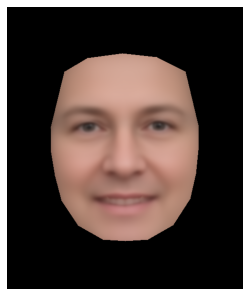

In [33]:
import facemorpher

facemorpher.averager(win_paths, plot=True)